In [456]:
# Import packages that are likely to be used
import tweepy
import requests
import os
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [457]:
# My personal confident twitter API information, removed for safety. 
consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'
# Authorising my information
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# Defining tweepy as api
api = tweepy.API(auth)

# Gather

In [458]:
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
  
# URL of the file to be downloaded is defined as file_url
r = requests.get(file_url) # create HTTP response object 
  
# send a HTTP request to the server and save 
# the HTTP response in a response object called r 
with open("image_predictions.tsv",'wb') as f: 

  
    # write the contents of the response (r.content) 
    # to a new file in binary mode. 
    f.write(r.content) 


In [459]:
# Read the tsv that we just downloaded 
df_image_predictions = pd.read_csv('image_predictions.tsv', delimiter='\t')
df_image_predictions.shape

(2075, 12)

In [460]:
# Read the csv the downloaded non programmatically
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.shape

(2356, 17)

In [ ]:
# Using the api to retrieve information from all tweets in the list df_twitter_archive.tweet_id
tweet_data = {}
for tweet in list(df_twitter_archive.tweet_id):
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

In [461]:
# Dump the information into a .txt file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = True)

In [462]:
# Read the .txt file
tweet_df = pd.read_json('tweet_json.txt',orient='index')
tweet_df.shape

(2308, 30)

# Assess 

### Assess df_image_predictions

In [463]:
df_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [464]:
df_image_predictions.tail(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [465]:
df_image_predictions.duplicated().sum()

0

In [466]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False


In [467]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [468]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [469]:
df_image_predictions.groupby('p1')['p1'].value_counts()

p1                              p1                            
Afghan_hound                    Afghan_hound                       4
African_crocodile               African_crocodile                  1
African_grey                    African_grey                       1
African_hunting_dog             African_hunting_dog                1
Airedale                        Airedale                          12
American_Staffordshire_terrier  American_Staffordshire_terrier    13
American_black_bear             American_black_bear                1
Angora                          Angora                             2
Appenzeller                     Appenzeller                        2
Arabian_camel                   Arabian_camel                      3
Arctic_fox                      Arctic_fox                         4
Australian_terrier              Australian_terrier                 2
Bedlington_terrier              Bedlington_terrier                 5
Bernese_mountain_dog            Bernese_

In [470]:
df_image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Assess df_twitter_archive


In [471]:
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [472]:
df_twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [473]:
df_twitter_archive.duplicated().sum()

0

In [474]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None


In [475]:
df_twitter_archive.shape

(2356, 17)

In [476]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [477]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [478]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [479]:
df_twitter_archive.query('rating_denominator > 10').shape

(20, 17)

In [480]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [481]:
df_twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Assess tweet_df


In [482]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2526,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,122,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,290,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,105,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [483]:
tweet_df.tail()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,39350,0,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9101,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/tD...,41170,0,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8402,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,24461,0,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4034,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,32500,0,NaN,892177421306343424,892177421306343424,...,NaN,NaN,NaN,6093,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/Mg...,37825,0,NaN,892420643555336192,892420643555336192,...,NaN,NaN,NaN,8249,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,"{'contributors_enabled': False, 'created_at': ..."


In [484]:
tweet_df.sample(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1996-01-24 05:55:44.365645825,NaN,NaN,2017-01-20 15:17:01,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,30023,0,NaN,822462944365645824,822462944365645824,...,NaN,NaN,NaN,15822,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,1,"{'contributors_enabled': False, 'created_at': ..."
1991-11-28 09:51:56.024623104,NaN,NaN,2016-01-24 18:09:23,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/g4...,2684,0,NaN,691321916024623104,691321916024623104,...,NaN,NaN,NaN,698,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,0,"{'contributors_enabled': False, 'created_at': ..."
1998-03-14 13:08:16.479866881,NaN,NaN,2017-07-25 16:11:53,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/u1...,27177,0,NaN,889880896479866880,889880896479866880,...,NaN,NaN,NaN,4833,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-02-15 23:10:09.219559425,NaN,NaN,2016-02-12 17:22:12,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/GP...,17451,0,NaN,698195409219559424,698195409219559424,...,NaN,NaN,NaN,6300,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,0,"{'contributors_enabled': False, 'created_at': ..."
1995-08-26 14:51:44.142938112,NaN,NaN,2016-12-15 17:23:04,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/EM...,7362,0,NaN,809448704142938112,809448704142938112,...,NaN,NaN,NaN,1597,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...","I call this one ""A Blep by the Sea"" 12/10 http...",0,"{'contributors_enabled': False, 'created_at': ..."


In [485]:
tweet_df.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2308.000000,2308.0,0.0,2.308000e+03,2.308000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2308.000000,2172.0,2172.0,2.500000e+01,2.500000e+01,2308.000000,2308.0,2308.000000
mean,NaN,NaN,7924.866984,0.0,NaN,7.425045e+17,7.425045e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.012998,0.0,0.0,8.151876e+17,8.151876e+17,2914.478769,0.0,0.106586
std,NaN,NaN,12244.445087,0.0,NaN,6.866929e+16,6.866929e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.113291,0.0,0.0,6.115399e+16,6.115399e+16,4890.922775,0.0,0.308653
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1344.750000,0.0,NaN,6.779127e+17,6.779127e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.888183e+17,7.888183e+17,580.750000,0.0,0.000000
50%,NaN,NaN,3431.500000,0.0,NaN,7.205952e+17,7.205952e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.322683e+17,8.322683e+17,1366.500000,0.0,0.000000
75%,NaN,NaN,9810.750000,0.0,NaN,7.993000e+17,7.993000e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.664587e+17,8.664587e+17,3407.000000,0.0,0.000000
max,NaN,NaN,163339.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,83066.000000,0.0,1.000000


In [486]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2308 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2308 non-null datetime64[ns]
entities                         2308 non-null object
extended_entities                1795 non-null object
favorite_count                   2308 non-null int64
favorited                        2308 non-null int64
geo                              0 non-null float64
id                               2308 non-null int64
id_str                           2308 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [487]:
tweet_df.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                 int64
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                           int64
lang                                     object
place                                    object
possibly_sensitive                      float64
possibly_sensitive_appealable           float64
quoted_status                           

## Problems

### df_image_predictions dataframe
 - Remove underscores from predictions
 - Capitalise predictions
 - Make tweet_id index
 - tweet_id should be string
 - Drop superfluous columns
 
### df_twitter_archive
 - tweet_id should be string 
 - Make tweet_id index 
 - Remove all rows that contain values in either 'in_reply_to_status_id', 'in_reply_to_user_id, 'retweeted_status_id' or 'retweeted_status_user_id'
 - Condense dog size rating columns into one column
 - Drop superfluous columns
 
### tweet_df

 - Remove duplicate column id
 - id should be string
 - Index id

### Joining Tables

 - Join tables on inner join using index of tweet_id
 - Drop superfluous columns (i.e not tweet_id, ratings, favourite count, retweet count, dog size, name, date)
 

******

# Clean

### Clean df_image_predictions dataframe

In [488]:
# Copy the dataframe to work nondestructively 
df_image_predictions_clean = df_image_predictions.copy()

**Define:** Remove underscores from predictions and capitalise predictions using str.title and str.replace

**Code:** 

In [489]:
# Replace underscores with blank space
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace('_',' ')
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace('_',' ')
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace('_',' ')
# Capitalise all words in string
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.title()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.title()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.title()

**Test:**

In [490]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define:** Convert tweet_id to string using astype

**Code:** 

In [491]:
# Convert tweet_id to string
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)

**Test:**

In [492]:
# Is an entry in tweet_id a string?
type(df_image_predictions_clean['tweet_id'][0]) is str

True

**Define:** Index tweet_id using set_index

**Code:** 

In [493]:
# Set index using to tweet_id
df_image_predictions_clean = df_image_predictions_clean.set_index('tweet_id')

**Test:**

In [494]:
df_image_predictions_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define:** Extract true value of image prediction using a loop through the Boolean expressions. Then add in curated lists into new column in dataframe. 

**Code:** 

In [495]:
# Create two empty arrays
breed = []
confidence = []
# Create function that iterates though each row. 
# If p1_dog is true then add p1 and p1_conf to the predefined arrays
# If unsuccessful then search for True in p2
# If unsuccessful then search for True in p3
# If no trues are found then add Unidentifiable and '0' to arrays 
def breed_confidence(df_image_predictions_clean):
    if  df_image_predictions_clean['p1_dog'] == True:
        breed.append(df_image_predictions_clean['p1'])
        confidence.append(df_image_predictions_clean['p1_conf'])
    elif df_image_predictions_clean['p2_dog'] == True:
        breed.append(df_image_predictions_clean['p2'])
        confidence.append(df_image_predictions_clean['p2_conf'])
    elif df_image_predictions_clean['p3_dog'] == True:
        breed.append(df_image_predictions_clean['p3'])
        confidence.append(df_image_predictions_clean['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)

In [496]:
# Make sure our new arrays are the same length as our original dateframe
df_image_predictions_clean.apply(breed_confidence, axis=1)
len(breed), len(confidence), len(df_image_predictions_clean)

(2075, 2075, 2075)

In [497]:
# Add our arrays to our dataframe
df_image_predictions_clean['breed'] = breed
df_image_predictions_clean['confidence'] = confidence
df_image_predictions_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
tweet_id,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


**Define:** Drop all unncessary columns using drop

**Code:** 

In [498]:
# Drop all unncessary columns using .drop
df_image_predictions_clean = df_image_predictions_clean.drop('jpg_url', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p1', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p1_conf', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p1_dog', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p2', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p2_conf', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p2_dog', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p3', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p3_conf', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('p3_dog', axis = 1)
df_image_predictions_clean = df_image_predictions_clean.drop('img_num', axis = 1)

**Test:**

In [499]:
# Check dataframe
df_image_predictions_clean.head()

,breed,confidence
tweet_id,,
666020888022790149,Welsh Springer Spaniel,0.465074
666029285002620928,Redbone,0.506826
666033412701032449,German Shepherd,0.596461
666044226329800704,Rhodesian Ridgeback,0.408143
666049248165822465,Miniature Pinscher,0.560311


In [500]:
df_image_predictions_clean.shape

(2075, 2)

## Clean df_twitter_archive

In [501]:
# Copy dataframe to work nondestructively 
df_twitter_archive_clean = df_twitter_archive.copy()

**Define:** Make tweet_id a string instead of a float

**Code:**

In [502]:
# Convert tweet_id into string
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)

**Test:** 

In [503]:
# Check if the first entry in tweet_id is a string
type(df_twitter_archive_clean['tweet_id'][0]) is str

True

**Define:** Make tweet_id index using set_index

**Code:**

In [504]:
# Set tweet_id as string
df_twitter_archive_clean = df_twitter_archive_clean.set_index('tweet_id')

**Test:**

In [505]:
df_twitter_archive_clean.head(1)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [506]:
df_twitter_archive_clean.shape

(2356, 16)

**Define:** Remove all rows that contain values in either 'in_reply_to_status_id', 'in_reply_to_user_id, 'retweeted_status_id' or 'retweeted_status_user_id' using df.isnull().any

**Code:**

In [507]:
# Remove all rows that are non null in 'in_reply_to_status_id' column
df_twitter_archive_clean['in_reply_to_status_id'] = df_twitter_archive_clean['in_reply_to_status_id'].isnull()
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id]

In [508]:
# Remove all rows that are non null in 'in_reply_to_user_id' column
df_twitter_archive_clean['in_reply_to_user_id'] = df_twitter_archive_clean['in_reply_to_user_id'].isnull()
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_user_id]

In [509]:
# Remove all rows that are non null in 'retweeted_status_id' column
df_twitter_archive_clean['retweeted_status_id'] = df_twitter_archive_clean['retweeted_status_id'].isnull()
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id]

In [510]:
# Remove all rows that are non null in 'retweeted_status_user_id' column
df_twitter_archive_clean['retweeted_status_user_id'] = df_twitter_archive_clean['retweeted_status_user_id'].isnull()
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id]

**Test:**

In [511]:
df_twitter_archive_clean.shape

(2097, 16)

**Define:** Condense dog size rating columns into one columns using pandas melt. 

**Code:**

In [512]:
# Replace all 'none' string entries into blank space in dog size rating columns
df_twitter_archive_clean.doggo     = df_twitter_archive_clean.doggo.replace('None', '')
df_twitter_archive_clean.floofer   = df_twitter_archive_clean.floofer.replace('None', '')
df_twitter_archive_clean.pupper    = df_twitter_archive_clean.pupper.replace('None', '')
df_twitter_archive_clean.puppo     = df_twitter_archive_clean.puppo.replace('None', '')

In [513]:
# Concatenate dog size rating columns
df_twitter_archive_clean["dog_type"] = df_twitter_archive_clean["doggo"] + df_twitter_archive_clean["floofer"] + df_twitter_archive_clean["pupper"] + df_twitter_archive_clean["puppo"]

In [514]:
df_twitter_archive_clean.dog_type.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [515]:
df_twitter_archive_clean.dog_type  = df_twitter_archive_clean.dog_type.replace('doggopupper', 'doggo + pupper')
df_twitter_archive_clean.dog_type  = df_twitter_archive_clean.dog_type.replace('doggopuppo', 'doggo + puppo')
df_twitter_archive_clean.dog_type  = df_twitter_archive_clean.dog_type.replace('doggofloofer', 'doggo + floofer')

**Test:**

In [516]:
df_twitter_archive_clean.dog_type.value_counts()

                   1761
pupper              221
doggo                72
puppo                23
floofer               9
doggo + pupper        9
doggo + puppo         1
doggo + floofer       1
Name: dog_type, dtype: int64

**Define:** Drop superfluous columns using .drop

**Code:**

In [517]:
# Drop all superfluous columns
df_twitter_archive_clean = df_twitter_archive_clean.drop('in_reply_to_status_id', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('in_reply_to_user_id', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('text', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('source', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_id', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_user_id', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_timestamp', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('expanded_urls', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('doggo', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('floofer', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('pupper', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('puppo', axis = 1)

**Test:**

In [518]:
df_twitter_archive_clean.head()

,timestamp,rating_numerator,rating_denominator,name,dog_type
tweet_id,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,
892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,
891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,
891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,
891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,


### Clean tweet_df 

In [519]:
# Copy dataframe to work non destructively
tweet_df_clean = tweet_df.copy()

In [520]:
tweet_df.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2526,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."


**Define:** Convert tweet_id into a string. 

**Code:**

In [521]:
# Convert id to string
tweet_df_clean.id = tweet_df_clean.id.astype(str)

**Test:**

In [522]:
# Check first entry in id is string
type(tweet_df_clean['id'][0]) is str

True

**Define:** Use id as the column index using set_index

**Code:**

In [523]:
# Set index to id
tweet_df_clean = tweet_df_clean.set_index('id')

**Test:**

In [524]:
tweet_df_clean.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
id,,,,,,,,,,,,,,,,,,,,,
666020888022790144,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2526,0,NaN,666020888022790144,None,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."


**Define:** Drop superfluous columns using .drop

**Code:**

In [525]:
# Drop all superfluous columns
tweet_df_clean = tweet_df_clean.drop('contributors', axis = 1)
tweet_df_clean = tweet_df_clean.drop('coordinates', axis = 1)
tweet_df_clean = tweet_df_clean.drop('created_at', axis = 1)
tweet_df_clean = tweet_df_clean.drop('entities', axis = 1)
tweet_df_clean = tweet_df_clean.drop('extended_entities', axis = 1)
tweet_df_clean = tweet_df_clean.drop('favorited', axis = 1)
tweet_df_clean = tweet_df_clean.drop('geo', axis = 1)
tweet_df_clean = tweet_df_clean.drop('id_str', axis = 1)
tweet_df_clean = tweet_df_clean.drop('in_reply_to_screen_name', axis = 1)
tweet_df_clean = tweet_df_clean.drop('quoted_status', axis = 1)
tweet_df_clean = tweet_df_clean.drop('quoted_status_id', axis = 1)
tweet_df_clean = tweet_df_clean.drop('retweeted', axis = 1)
tweet_df_clean = tweet_df_clean.drop('source', axis = 1)
tweet_df_clean = tweet_df_clean.drop('retweeted_status', axis = 1)
tweet_df_clean = tweet_df_clean.drop('text', axis = 1)
tweet_df_clean = tweet_df_clean.drop('truncated', axis = 1)
tweet_df_clean = tweet_df_clean.drop('user', axis = 1)
tweet_df_clean = tweet_df_clean.drop('in_reply_to_status_id', axis = 1)
tweet_df_clean = tweet_df_clean.drop('in_reply_to_status_id_str', axis = 1)
tweet_df_clean = tweet_df_clean.drop('in_reply_to_user_id', axis = 1)
tweet_df_clean = tweet_df_clean.drop('in_reply_to_user_id_str', axis = 1)
tweet_df_clean = tweet_df_clean.drop('is_quote_status', axis = 1)
tweet_df_clean = tweet_df_clean.drop('lang', axis = 1)
tweet_df_clean = tweet_df_clean.drop('place', axis = 1)
tweet_df_clean = tweet_df_clean.drop('possibly_sensitive', axis = 1)
tweet_df_clean = tweet_df_clean.drop('possibly_sensitive_appealable', axis = 1)
tweet_df_clean = tweet_df_clean.drop('quoted_status_id_str', axis = 1)

In [526]:
tweet_df_clean.head()

,favorite_count,retweet_count
id,,
666020888022790144,2526,498
666029285002620928,125,46
666033412701032448,122,43
666044226329800704,290,136
666049248165822464,105,42


## Joining dataframes

In [527]:
# Concatenate dataframes into master
master_clean = pd.concat([tweet_df_clean, df_twitter_archive_clean, df_image_predictions_clean], axis=1, join='inner')
master_clean.head()

,favorite_count,retweet_count,timestamp,rating_numerator,rating_denominator,name,dog_type,breed,confidence
666029285002620928,125,46,2015-11-15 23:05:30 +0000,7,10,a,,Redbone,0.506826
666044226329800704,290,136,2015-11-16 00:04:52 +0000,6,10,a,,Rhodesian Ridgeback,0.408143
666051853826850816,1196,830,2015-11-16 00:35:11 +0000,2,10,an,,Unidentifiable,0.000000
666057090499244032,289,138,2015-11-16 00:55:59 +0000,9,10,a,,Golden Retriever,0.007959
666058600524156928,109,57,2015-11-16 01:01:59 +0000,8,10,the,,Miniature Poodle,0.201493


## Assess master_clean

In [528]:
master_clean.dtypes

favorite_count          int64
retweet_count           int64
timestamp              object
rating_numerator        int64
rating_denominator      int64
name                   object
dog_type               object
breed                  object
confidence            float64
dtype: object

In [529]:
# Find out what type the first entry in timestamp column is
type(master_clean['timestamp'][0])

str

In [530]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1266 entries, 666029285002620928 to 891815181378084864
Data columns (total 9 columns):
favorite_count        1266 non-null int64
retweet_count         1266 non-null int64
timestamp             1266 non-null object
rating_numerator      1266 non-null int64
rating_denominator    1266 non-null int64
name                  1266 non-null object
dog_type              1266 non-null object
breed                 1266 non-null object
confidence            1266 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 138.9+ KB


In [531]:
master_clean.describe()

,favorite_count,retweet_count,rating_numerator,rating_denominator,confidence
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,8152.194313,2450.899684,12.789889,10.465245,0.461848
std,11302.974056,3908.519037,51.679233,7.234031,0.338322
min,77.000000,11.000000,1.000000,2.000000,0.000000
25%,1638.000000,557.250000,10.000000,10.000000,0.140030
50%,3734.500000,1223.500000,11.000000,10.000000,0.457260
75%,10233.250000,2934.250000,12.000000,10.000000,0.768731
max,126280.000000,60560.000000,1776.000000,170.000000,0.999956


In [532]:
master_clean.duplicated().sum()

0

### Problems
 - Convert timestamp column to timedate
 - Deal with incorrect names
 - Introduce new variable called Likeability 

**Define:** Convert timestamp column to timedate using pd.to_datetime

**Code:**

In [533]:
# Convert timestamp to datetime
master_clean['timestamp'] = pd.to_datetime(master_clean['timestamp'])

**Test:**

In [534]:
# Check the first entry in timestamp is timestamp
type(master_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Define:** Replace all names with np.nan that the naming search incorrectly identified.

**Code:**

In [535]:
# Produce a list of unique names 
master_clean.name.unique()

array(['a', 'an', 'the', 'None', 'Walter', 'Jimothy', 'Christoper',
       'Josep', 'Jockson', 'Jeph', 'Carll', 'Klevin', 'Dave', 'Gabe',
       'Kenneth', 'Clarence', 'Genevieve', 'Fwed', 'Biden', 'Cupcake',
       'Reese', 'Dook', 'Naphaniel', 'Frank', 'Kial', 'Olive', 'Calvin',
       'Filup', 'Shaggy', 'Erik', 'Cleopatricia', 'Alfie', 'Skittles',
       'Torque', 'Bisquick', 'Jareld', 'Sophie', 'Rusty', 'Jo', 'Gòrdón',
       'Marvin', 'Kallie', 'Jomathan', 'Maks', 'Timofy', 'Zeek', 'Hanz',
       'Winifred', 'Kevon', 'Banditt', 'Bobb', 'Amélie', 'Lambeau',
       'Jaycob', 'Chaz', 'Ruby', 'Bernie', 'Terrance', 'Tucker', 'Samsom',
       'Jaspers', 'Ralf', 'Kirk', 'Dug', 'Saydee', 'Oliviér', 'Billl',
       'Ronduh', 'Keith', 'Linda', 'Skye', 'Penny', 'Shawwn', 'Kloey',
       'Chester', 'Andru', 'Julio', 'Raphael', 'Tommy', 'Winston',
       'Wally', 'Sandra', 'Daisy', 'Larry', 'Nigel', 'Peanut', 'Damon',
       'Herb', 'Willy', 'Sam', 'Hank', 'Koda', 'Paull', 'Bloo', 'Pluto',
   

In [536]:
# Notice all incorrect names are not capitalised. We will replace all non capitalised strings
# with np.nan
# create empty array
names=[]

#define function that iterates through name column checking if the first letter is lowercase.
# if true insert np.nan in names otherwise insert actual name
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append(np.nan)
    else:
        names.append(row['name'])
        
# use this function on master_clean
master_clean.apply(incorrect_name, axis=1)

#add names list to master_clean and check dataframe
master_clean['names'] = names
master_clean.head(1)

,favorite_count,retweet_count,timestamp,rating_numerator,rating_denominator,name,dog_type,breed,confidence,names
666029285002620928,125,46,2015-11-15 23:05:30+00:00,7,10,a,,Redbone,0.506826,NaN


In [537]:
master_clean.names = master_clean.names.replace('None', np.nan)
master_clean = master_clean.drop('name', axis = 1)


**Test:**

In [538]:
master_clean.names.unique()

array([nan, 'Walter', 'Jimothy', 'Christoper', 'Josep', 'Jockson', 'Jeph',
       'Carll', 'Klevin', 'Dave', 'Gabe', 'Kenneth', 'Clarence',
       'Genevieve', 'Fwed', 'Biden', 'Cupcake', 'Reese', 'Dook',
       'Naphaniel', 'Frank', 'Kial', 'Olive', 'Calvin', 'Filup', 'Shaggy',
       'Erik', 'Cleopatricia', 'Alfie', 'Skittles', 'Torque', 'Bisquick',
       'Jareld', 'Sophie', 'Rusty', 'Jo', 'Gòrdón', 'Marvin', 'Kallie',
       'Jomathan', 'Maks', 'Timofy', 'Zeek', 'Hanz', 'Winifred', 'Kevon',
       'Banditt', 'Bobb', 'Amélie', 'Lambeau', 'Jaycob', 'Chaz', 'Ruby',
       'Bernie', 'Terrance', 'Tucker', 'Samsom', 'Jaspers', 'Ralf',
       'Kirk', 'Dug', 'Saydee', 'Oliviér', 'Billl', 'Ronduh', 'Keith',
       'Linda', 'Skye', 'Penny', 'Shawwn', 'Kloey', 'Chester', 'Andru',
       'Julio', 'Raphael', 'Tommy', 'Winston', 'Wally', 'Sandra', 'Daisy',
       'Larry', 'Nigel', 'Peanut', 'Damon', 'Herb', 'Willy', 'Sam',
       'Hank', 'Koda', 'Paull', 'Bloo', 'Pluto', 'Gin', 'Traviss', 'Creg'

**Define:** Introduce a new variable called 'likeability' which is the numerator over the denominator, multiplied by the favourite count and the retweet count. 

\begin{equation*}
likeability = ((rating numerator) / (rating denominator)) * (favorite count) * (retweet count)
\end{equation*}

**Code:**

In [539]:
# Add new variable to dataframe with above equation
master_clean['likeability'] = (master_clean['rating_numerator'] / master_clean['rating_denominator']) * master_clean['favorite_count'] * master_clean['retweet_count']

**Test:**

In [540]:
master_clean.head()

,favorite_count,retweet_count,timestamp,rating_numerator,rating_denominator,dog_type,breed,confidence,names,likeability
666029285002620928,125,46,2015-11-15 23:05:30+00:00,7,10,,Redbone,0.506826,NaN,4025.0
666044226329800704,290,136,2015-11-16 00:04:52+00:00,6,10,,Rhodesian Ridgeback,0.408143,NaN,23664.0
666051853826850816,1196,830,2015-11-16 00:35:11+00:00,2,10,,Unidentifiable,0.000000,NaN,198536.0
666057090499244032,289,138,2015-11-16 00:55:59+00:00,9,10,,Golden Retriever,0.007959,NaN,35893.8
666058600524156928,109,57,2015-11-16 01:01:59+00:00,8,10,,Miniature Poodle,0.201493,NaN,4970.4


## Storing the Clean Dataframe

In [541]:
# Save dataframe
master_clean.to_csv('twitter_archive_master.csv', sep='\t')

# Analysis

The questions I want to answer are as follows:

 1. Which breed of dog has the highest average likeability?
 2. Which breed of dog has the lowest average likeability?
 3. Are dogs named Jack very likeable? 
 4. What are the most popular 5 names?
 5. Have the numerator ratings increased over time? 
 6. Which dog type receives the highest average favorite count? 
 7. What is the proportion of dog types?
 8. What dog breed is rated the most?

### Q1. Which breed of dog has the highest average likeability?

**Define:** Find the breed of dog with the highest likeability by grouping by breed and averaging over the likeability column. Return a list of the top 5 goodest dogs.

**Code**:

In [542]:
Q1 = master_clean.groupby('breed').mean()
Q1plot = Q1.sort_values(by=['likeability'], ascending=False)[:5]['likeability']

**Plot:**

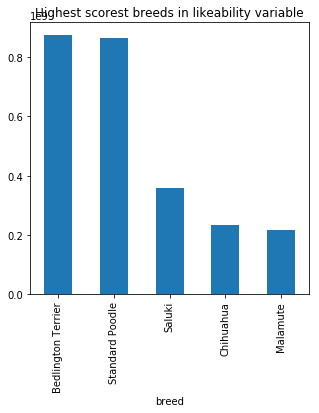

In [543]:
Q1plot.plot(title = 'Highest scorest breeds in likeability variable',
                     y = 'likeability', 
                     kind = 'bar', 
                     figsize=(5,5));

### Q2. Which breed of dog has the lowest average likeability?

**Define:** Find the breed of dog with the lowest likeability by grouping by breed and averaging over the likeability column. Return a list of the top 5 least goodest dogs.

**Code:**

In [544]:
Q2 = master_clean.groupby('breed').mean()
Q2plot = Q1.sort_values(by=['likeability'], ascending=True)[:5]['likeability']

**Plot:**

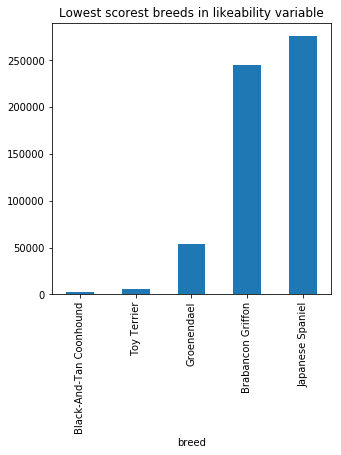

In [545]:
Q2plot.plot(title = 'Lowest scorest breeds in likeability variable',
                     y = 'likeability', 
                     kind = 'bar', 
                     figsize=(5,5));

### Q3. Are dogs named Jack very likeable?

**Define:** Group master_clean by name and calculate the average likeability. Sort this in descending order and reset this new dataframe. Then query this data frame to find the entry with the name Jack.

**Code:**

In [546]:
master_clean.query('names == "Jack"')

,favorite_count,retweet_count,timestamp,rating_numerator,rating_denominator,dog_type,breed,confidence,names,likeability
879376492567855104,16420,3033,2017-06-26 16:31:08+00:00,12,10,,Labrador Retriever,0.033496,Jack,59762232.0


In [547]:
Q3 = master_clean.groupby('names').mean()

In [548]:
Q3v1 = Q3.sort_values(by=['likeability'], ascending=False)
Q3v1

,favorite_count,retweet_count,rating_numerator,rating_denominator,confidence,likeability
names,,,,,,
Stephan,126280.000000,60560.000000,13.000000,10.0,0.505370,9.941772e+09
Atticus,5348.000000,2611.000000,1776.000000,10.0,0.000000,2.479940e+09
Aja,77984.000000,18613.000000,13.000000,10.0,0.837956,1.886971e+09
Bo,35600.666667,14807.333333,12.333333,10.0,0.533930,1.721825e+09
Lilly,70112.000000,18024.000000,13.000000,10.0,0.908703,1.642808e+09
Zoey,54367.000000,15040.500000,13.000000,10.0,0.664288,1.447788e+09
Logan,19337.000000,6628.000000,75.000000,10.0,0.467321,9.612423e+08
Hurley,32955.000000,19952.000000,11.000000,10.0,0.621780,7.232700e+08
Phil,37430.000000,13853.000000,12.500000,10.0,0.310384,6.452389e+08


In [549]:
Q3v1.reset_index().query('names == "Jack"')

,names,favorite_count,retweet_count,rating_numerator,rating_denominator,confidence,likeability
125,Jack,16420.0,3033.0,12.0,10.0,0.033496,59762232.0


In [550]:
len(Q3v1)

639

### Q4. What are the most popular 5 names?

**Define:** Find the value counts for the 5 most popular names in the master_clean dataframe. 

**Code:** 

In [551]:
Q4 = master_clean['names'].value_counts()[0:5]
Q4

Oliver     8
Tucker     7
Winston    7
Penny      6
Cooper     6
Name: names, dtype: int64

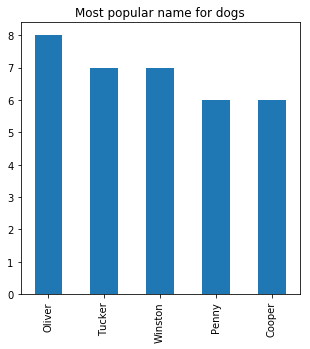

In [552]:
Q4.plot(title = 'Most popular name for dogs',
                     x = 'names', 
                     kind = 'bar', 
                     figsize=(5,5));

### Q5. Have the numerator ratings increased over time?

**Define:** Plot the numerator ratings against time

**Code:**

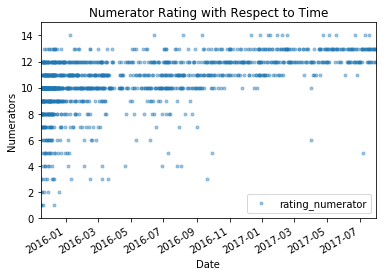

In [553]:
master_clean.plot(x = 'timestamp', y ='rating_numerator', ylim=[0,15], style = '.', alpha = 0.4)
plt.title('Numerator Rating with Respect to Time')
plt.xlabel('Date')
plt.ylabel('Numerators');

### Q6. Which dog type receives the highest average favorite count?

**Define:** Group master_clean by dog_type and average over the favorite_count column. Then sort is descending order and limit to 5 rows. 

**Code:**

In [554]:
Q6 = master_clean.groupby('dog_type').mean()

In [555]:
Q6v1 = Q6.sort_values(by=['likeability'], ascending=False)

**Plot:**

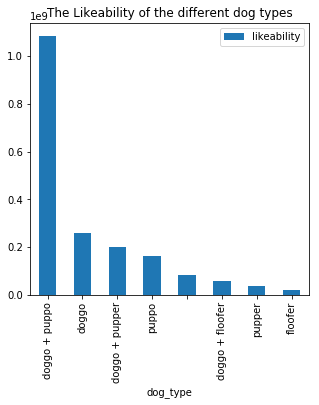

In [556]:
Q6v1.plot(title = 'The Likeability of the different dog types',
                     y = 'likeability', 
                     kind = 'bar', 
                     figsize=(5,5));

 ### Q7. What is the proportion of dog types?

**Define:** Group the master_clean dataframe by dog_type and counts the amount of entries. Sort the entries into ascending order and remove the entries that have no dog_type.

**Code:**

In [557]:
Q7 = master_clean.groupby('dog_type').count().sort_values(by=['likeability'], ascending=False)[1:]

**Plot:**

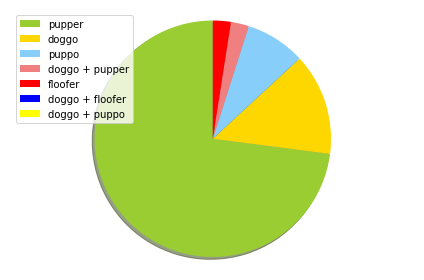

In [558]:
import matplotlib.pyplot as plt
 
labels = ['pupper', 'doggo', 'puppo', 'doggo + pupper', 'floofer', 'doggo + floofer', 'doggo + puppo']    
sizes = Q7['names']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'blue', 'yellow']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show();

### Q8. What dog breed is rated the most?

**Define:** Groupy the master_clean by breed, counts the amount of entries and sort them in descending order. Remove the unidentified dogs. 

**Code:**

In [559]:
Q8 = master_clean.groupby('breed').count().sort_values(by=['likeability'], ascending=False)[1:10]
Q8.head()

,favorite_count,retweet_count,timestamp,rating_numerator,rating_denominator,dog_type,confidence,names,likeability
breed,,,,,,,,,
Golden Retriever,105,105,105,105,105,105,105,69,105
Pembroke,70,70,70,70,70,70,70,50,70
Labrador Retriever,67,67,67,67,67,67,67,42,67
Chihuahua,52,52,52,52,52,52,52,38,52
Pug,43,43,43,43,43,43,43,30,43


**plot:**

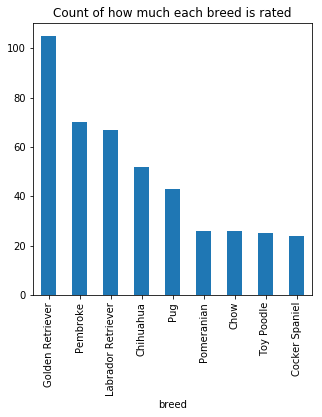

In [560]:
Q8.plot(title = 'Count of how much each breed is rated',
                     y = 'likeability',
                     kind = 'bar',
                     legend=None, 
                     figsize=(5,5));

******

# Conclusions

As a dog lover, I found this project really interesting. 

From my analysis I found several insights that helped me deduce key statistics and relationships between the scrapped twitter data, the image predictions and archival twitter data. 

My introduced variable likeability (which I was tempted to name dogitude) showed an understanding between WeRateDogs seemingly superficial rating and the amount of likes/retweets each post gets. 

I have written a short report named act_report.html on my findings which you can find in the project repository. 

I have also written a report named wrangle_report.html on my wrangling efforts during the project. 

*****

# Sources

https://www.geeksforgeeks.org/downloading-files-web-using-python/


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb